## 

# Getting Data from Oracle Database to Python

### Installing cx_Oracle and setting up the path to InstantClient

In [1]:
# Installing CX_Oracle
!pip install cx_Oracle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing required libraries and setting the Oracle Client Address
import pandas as pd
from pandas import DataFrame
import cx_Oracle
import os
directory_path = os.getcwd() + "\instantclient-basic-windows.x64-21.3.0.0.0\instantclient_21_3"

cx_Oracle.init_oracle_client(lib_dir= directory_path)

### Creating connection string and fetching data from the view

In [3]:
# Connecting to the Oracle Database
try:
    # Connection String
    connection = cx_Oracle.connect(user='sr0902m', password='sr0902m', dsn='OBIWAN')
    my_cursor = connection.cursor()
    # Select data from the view to DataFrame
    my_cursor.execute("select * from DECISION_TREE_VIEW")
    df = DataFrame(my_cursor.fetchall())
    df.columns = [x[0] for x in my_cursor.description]
except cx_Oracle.Error as error:
    print(error)
finally:
    # Closing cursor and connection
    if my_cursor:
        my_cursor.close()
    if connection:
        connection.close()

In [4]:
# Print the result from our DataFrame
df.head()

,SESSION_DATE,QUARTER,APPOINTMENT_SYSTEM,COUNCIL_TYPE,GENDER,AGE_BAND,PREFERRED_COVER,USES_CAR,COVER
0,2011-02-05,1,1,4,None,<30,None,None,Shop Assistant
1,2011-02-07,1,2,5,Male,>60,Shop Assistant,NO,Window Dresser
2,2011-02-07,1,2,4,None,<30,None,None,Shop Assistant
3,2011-02-08,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant
4,2011-02-08,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant


# EDA & Data Preprocessing
After the data has been loaded into dataframe from Oracle Database View, the next step is to perform some exploratory dta analysis ana preporcesssing on the data to make sure that is is suibale to be fetched into our machine learning model.

In [30]:
# Import required libraries required by Data Preprocessing and ML implementation
# Numerical Analysis
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


# Data Preprocessing
from sklearn.preprocessing import LabelEncoder

# Train-Test Split
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Metrices
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Print first 10 rows of the datframe
df.head(10)

,SESSION_DATE,QUARTER,APPOINTMENT_SYSTEM,COUNCIL_TYPE,GENDER,AGE_BAND,PREFERRED_COVER,USES_CAR,COVER
0,2011-02-05,1,1,4,None,<30,None,None,Shop Assistant
1,2011-02-07,1,2,5,Male,>60,Shop Assistant,NO,Window Dresser
2,2011-02-07,1,2,4,None,<30,None,None,Shop Assistant
3,2011-02-08,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant
4,2011-02-08,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant
5,2011-02-12,1,2,4,Male,41-50,Floor Manager,NO,Floor Manager
6,2011-02-12,1,2,4,None,<30,None,None,Shop Assistant
7,2011-02-13,1,3,3,Male,41-50,Stores Assistant,NO,Shop Assistant
8,2011-02-13,1,2,2,None,<30,None,None,Shop Assistant
9,2011-02-13,1,2,4,None,<30,None,None,Shop Assistant


In [7]:
# Print last 10 rows of the datframe
df.tail(10)

,SESSION_DATE,QUARTER,APPOINTMENT_SYSTEM,COUNCIL_TYPE,GENDER,AGE_BAND,PREFERRED_COVER,USES_CAR,COVER
289,2011-08-29,3,2,1,None,<30,None,None,Stores Assistant
290,2011-08-30,3,2,1,None,<30,None,None,Window Dresser
291,2011-10-23,4,2,4,Male,41-50,Stores Assistant,NO,Shop Assistant
292,2011-10-23,4,2,4,Male,41-50,Stores Assistant,NO,Shop Assistant
293,2011-10-31,4,2,4,Male,41-50,Stores Assistant,NO,Floor Manager
294,2011-10-31,4,2,4,Male,41-50,Stores Assistant,NO,Floor Manager
295,2011-12-11,4,2,3,Male,>60,Shop Assistant,NO,Shop Assistant
296,2012-02-13,1,2,4,None,<30,None,None,Window Dresser
297,2012-06-19,2,2,4,None,<30,None,None,Floor Manager
298,2012-06-24,2,2,4,None,<30,None,None,Cashier


In [8]:
# List the data types of columns in our dataframe
df.dtypes

SESSION_DATE          datetime64[ns]
QUARTER                        int64
APPOINTMENT_SYSTEM             int64
COUNCIL_TYPE                   int64
GENDER                        object
AGE_BAND                      object
PREFERRED_COVER               object
USES_CAR                      object
COVER                         object
dtype: object

In [9]:
# List the unique values from each of our columns 
print(df['QUARTER'].unique())
print(df['APPOINTMENT_SYSTEM'].unique())
print(df['GENDER'].unique())
print(df['AGE_BAND'].unique())
print(df['PREFERRED_COVER'].unique())
print(df['USES_CAR'].unique())
print(df['COVER'].unique())

[1 2 3 4]
[1 2 3]
[None 'Male' 'Female']
['<30' '>60' '41-50' '51-60' '31-40']
[None 'Shop Assistant' 'Floor Manager' 'Stores Assistant' 'Window Dresser']
[None 'NO']
['Shop Assistant' 'Window Dresser' 'Floor Manager' 'Stores Assistant'
 'Cashier']


In [10]:
# Print the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SESSION_DATE        299 non-null    datetime64[ns]
 1   QUARTER             299 non-null    int64         
 2   APPOINTMENT_SYSTEM  299 non-null    int64         
 3   COUNCIL_TYPE        299 non-null    int64         
 4   GENDER              116 non-null    object        
 5   AGE_BAND            299 non-null    object        
 6   PREFERRED_COVER     116 non-null    object        
 7   USES_CAR            116 non-null    object        
 8   COVER               299 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 21.1+ KB


As we can ses froma above, there are a lot of null records in our database which needs to be removed before we do our further analysis.

In [11]:
# Create a new dataframe by dropping null rows from our dataframe
df_ml=df.dropna()

In [12]:
# Print the dataframe info
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 1 to 295
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SESSION_DATE        116 non-null    datetime64[ns]
 1   QUARTER             116 non-null    int64         
 2   APPOINTMENT_SYSTEM  116 non-null    int64         
 3   COUNCIL_TYPE        116 non-null    int64         
 4   GENDER              116 non-null    object        
 5   AGE_BAND            116 non-null    object        
 6   PREFERRED_COVER     116 non-null    object        
 7   USES_CAR            116 non-null    object        
 8   COVER               116 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 9.1+ KB


In [13]:
# Dropping SESSION_DATE column as we will not be needing that
df_ml=df_ml.drop(['SESSION_DATE'], axis=1)

In [14]:
# Print Dataframe head after preprocessing
df_ml.head(10)

,QUARTER,APPOINTMENT_SYSTEM,COUNCIL_TYPE,GENDER,AGE_BAND,PREFERRED_COVER,USES_CAR,COVER
1,1,2,5,Male,>60,Shop Assistant,NO,Window Dresser
3,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant
4,1,1,4,Male,>60,Shop Assistant,NO,Shop Assistant
5,1,2,4,Male,41-50,Floor Manager,NO,Floor Manager
7,1,3,3,Male,41-50,Stores Assistant,NO,Shop Assistant
11,1,2,1,Female,51-60,Stores Assistant,NO,Shop Assistant
14,1,2,5,Male,>60,Shop Assistant,NO,Window Dresser
15,1,2,5,Female,31-40,Stores Assistant,NO,Shop Assistant
16,1,1,4,Female,31-40,Stores Assistant,NO,Shop Assistant
17,1,2,3,Female,>60,Shop Assistant,NO,Shop Assistant


### Visualizing Data using Pie Chart

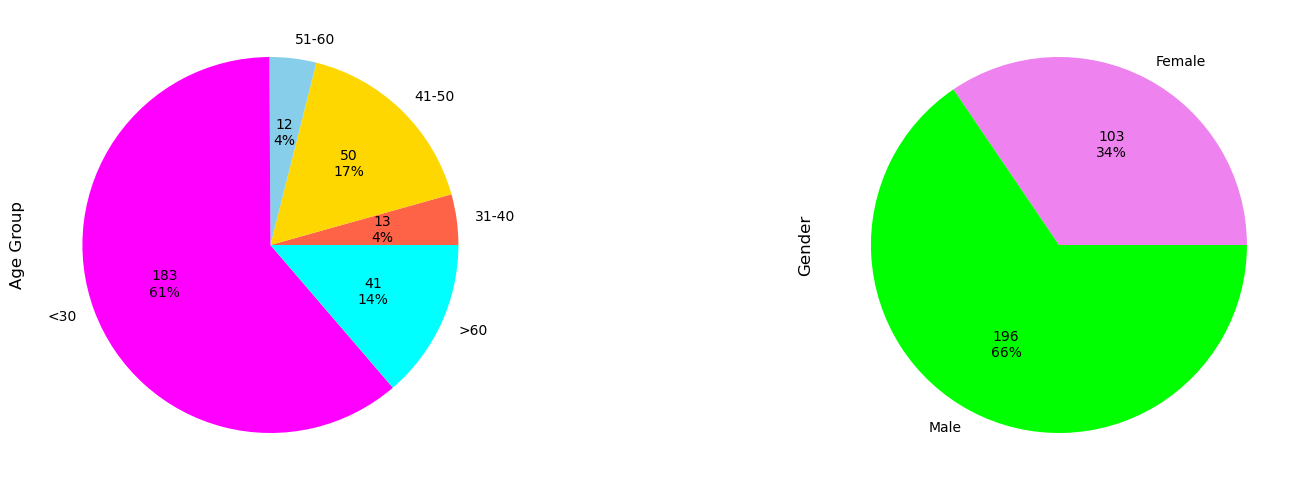

In [49]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5))

df.groupby('AGE_BAND').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold', 'skyblue','magenta','cyan'], ax=ax1)
df.groupby('GENDER').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                 colors=['violet', 'lime'], ax=ax2)
ax1.set_ylabel('Age Group', size=12)
ax2.set_ylabel('Gender', size=12)
# plt.title('Cover Count based on age group and gender')
plt.tight_layout()

Text(0.5, 0, 'Quarters')

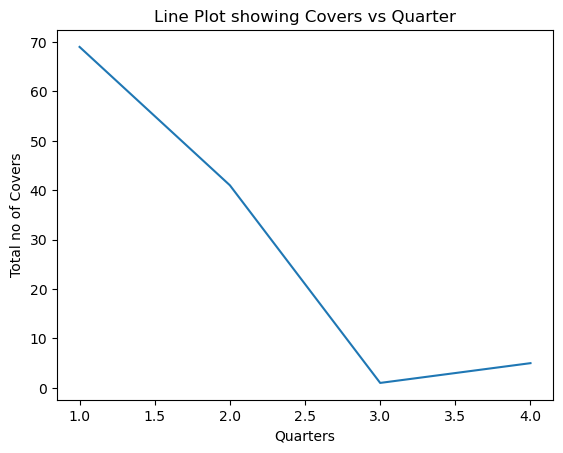

In [60]:
# Line Plot (Quarter Vs Covers)
df_ml.groupby('QUARTER').size().plot(kind='line')
plt.title('Line Plot showing Covers vs Quarter')
plt.ylabel('Total no of Covers')
plt.xlabel('Quarters')

# Implementing ML Solution using Decision Tree
We will beimplementing Decision Tree algorithm to predict the TYPE_OF_COVER based on the parameters such as GENDER, AGE_BAND, COUNCIL_TYPE, APPOINTMENT_SYSTEM, USES_CAR, PREFERRED_COVER and QUARTER.

### Encoding Dataframe using Lable Encoder

In [15]:
le = LabelEncoder()

# Here, we will not be encoding fields QUARTER and APPOINTMENT_SYSTEM as they are already numerical values
for values in ['Male', 'Female']:
    df_ml['GENDER'] = le.fit_transform(df_ml['GENDER'])  
for values in ['<30' '31-40' '41-50' '51-60', '>60']:
    df_ml['AGE_BAND'] = le.fit_transform(df_ml['AGE_BAND'])  
for values in ['NO', 'YES']:
    df_ml['USES_CAR'] = le.fit_transform(df_ml['USES_CAR'])  
for values in ['Floor Manager','Cleaner','Cashier','Shop Assistant','Window Dresser','Stores Assistant']:
    df_ml['PREFERRED_COVER'] = le.fit_transform(df_ml['PREFERRED_COVER'])  
for values in ['Floor Manager','Cleaner','Cashier','Shop Assistant','Window Dresser','Stores Assistant']:
    df_ml['COVER'] = le.fit_transform(df_ml['COVER'])

In [16]:
# Print the dataframe after encoding
df_ml.head(10)

,QUARTER,APPOINTMENT_SYSTEM,COUNCIL_TYPE,GENDER,AGE_BAND,PREFERRED_COVER,USES_CAR,COVER
1,1,2,5,1,3,1,0,3
3,1,1,4,1,3,1,0,1
4,1,1,4,1,3,1,0,1
5,1,2,4,1,1,0,0,0
7,1,3,3,1,1,2,0,1
11,1,2,1,0,2,2,0,1
14,1,2,5,1,3,1,0,3
15,1,2,5,0,0,2,0,1
16,1,1,4,0,0,2,0,1
17,1,2,3,0,3,1,0,1


Encoding Pattern

#### Gender --> 1 (Male), 0 (Female)
#### Age Band --> 0 (31-40), 1 (41-50), 2 (51-60), 3 (>60), 4(<30)
#### Uses Car --> 0 (NO), 1 (YES)
#### Preferred Cover / Cover --> 0 (Floor Manager), 1 (Shop Assistant), 2 (Stores Assistant), 3 (Window Dresser), 4 (Cleaner), 5 (Cashier)

### Train-Test Split

In [19]:
# Splitting Data
X_train, X_test, y_train, y_test =train_test_split(df_ml.drop('COVER',axis=1), df_ml['COVER'], test_size=.4,
                                                   random_state=1)
# Printing the Shape
X_train.shape,X_test.shape

((69, 7), (47, 7))

### Decision Tree

In [23]:
# Decision Tree
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=6, min_samples_leaf=5)
dt = dt.fit(X_train, y_train)
print(dt)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=100)


In [25]:
y_pred=dt.predict(X_test)

In [27]:
y_pred

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1,
       3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 1, 1], dtype=int64)

# Evaluating the Model

### Classification Report

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      0.93      0.86        27
           3       0.88      1.00      0.93        14

    accuracy                           0.83        47
   macro avg       0.56      0.64      0.60        47
weighted avg       0.72      0.83      0.77        47



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [33]:
# Printing Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[ 0  6  0]
 [ 0 25  2]
 [ 0  0 14]]


[Text(0.5, 1.0, 'Confusion Matrix')]

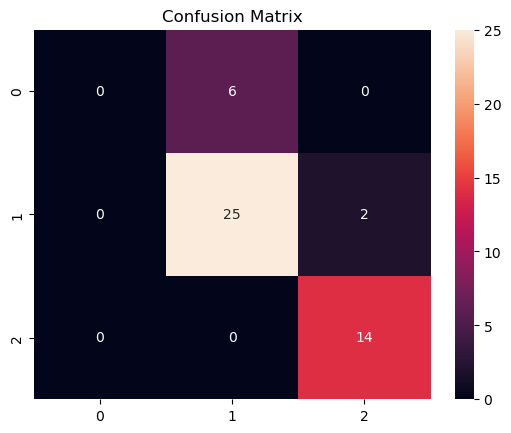

In [34]:
# Visualizing Confusion Matrix
c_m = confusion_matrix(y_test, y_pred)
sns.heatmap(c_m, annot=True).set(title="Confusion Matrix")

### Visualizing the Tree

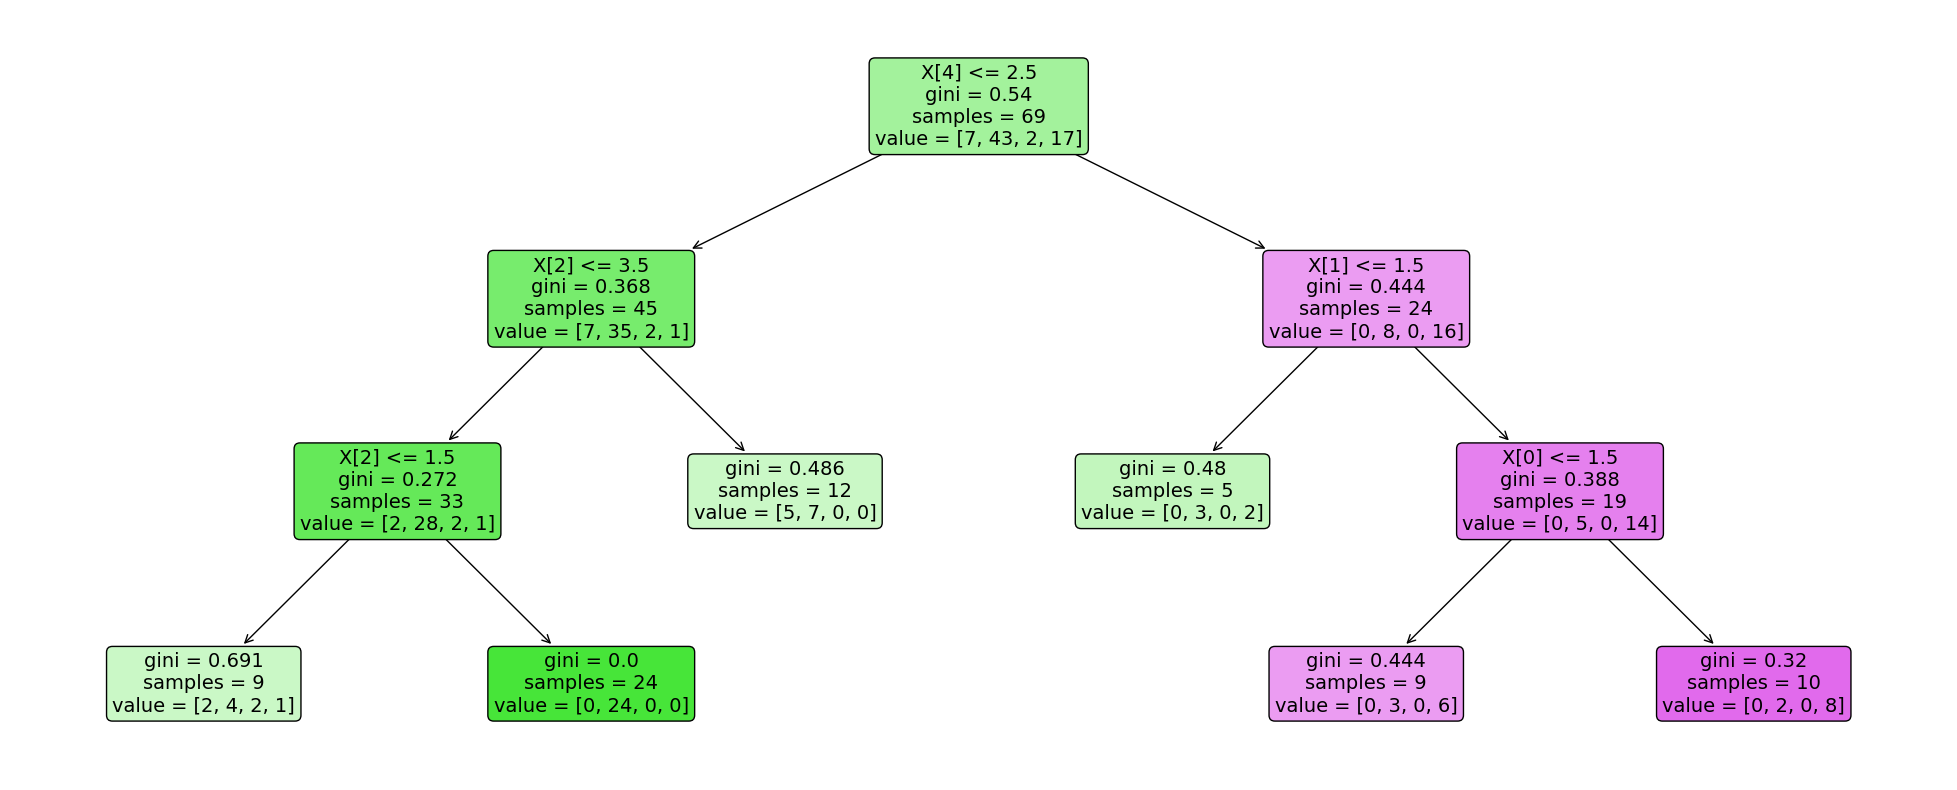

In [32]:
# Visualising the Tree
plt.figure(figsize=(25,10))
plt.title("Decision Tree")
a=tree.plot_tree(dt,
           filled=True,
           rounded=True,
           fontsize=14)
plt.savefig("d.png")